In [1]:
import pandas as pd
path = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_IoT_dataset/IoT_Weather.csv"
weatherData = pd.read_csv(path)
print(weatherData.shape)
weatherData.head()

(650242, 7)


,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [2]:
weatherData.drop('type', axis = 1, inplace=True)
weatherData.drop(weatherData.iloc[:, 0:2], axis = 1, inplace=True)
weatherData.head()

,temperature,pressure,humidity,label
0,31.788508,1.035,32.036579,0
1,41.630997,1.035,30.886165,0
2,42.256959,1.035,19.755908,0
3,49.116581,1.035,78.949621,0
4,24.017085,1.035,40.001059,0


col:  temperature


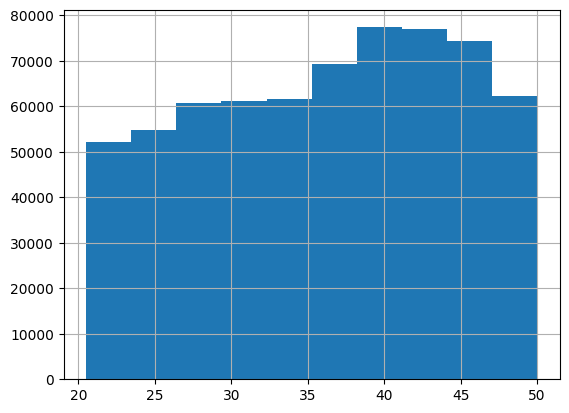

col:  pressure


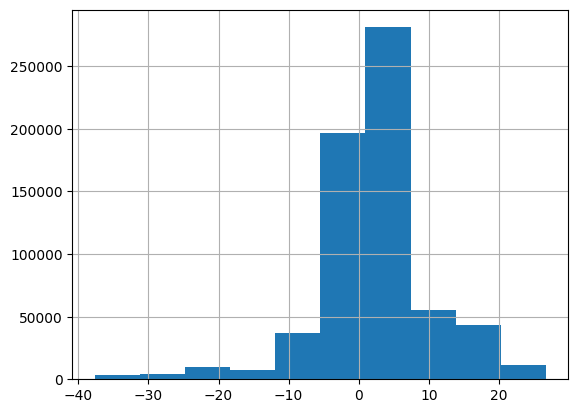

col:  humidity


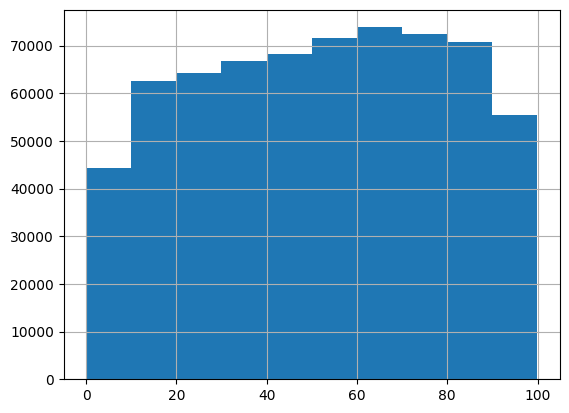

col:  label


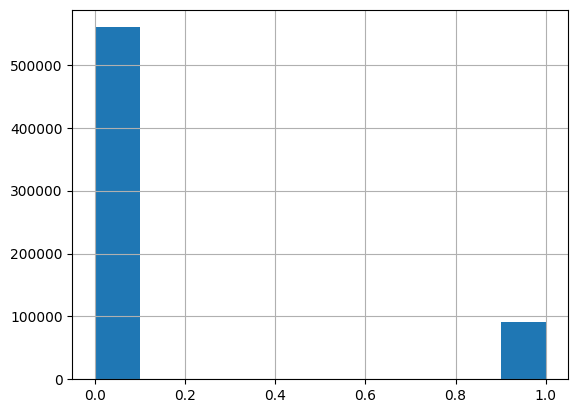

In [3]:
import matplotlib.pyplot as plt
columns = weatherData.columns
for col in columns:
    print("col: ", col)
    weatherData[col].hist()
    plt.show()

In [4]:
x = weatherData.drop('label', axis = 1)
y = weatherData['label']
print(y.value_counts())

0    559718
1     90524
Name: label, dtype: int64


In [5]:
y.dtypes

dtype('int64')

In [6]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [7]:
from sklearn.metrics import f1_score, accuracy_score

def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

# Without Oversampling

In [8]:
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
RF_accuracy_scores = []
RF_f1_scores = []

for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    RF_accuracy_scores.append(get_accuracy_score(RandomForestClassifier(n_estimators=10, random_state = 10), x_train, x_test, y_train, y_test))
    RF_f1_scores.append(get_f1_score(RandomForestClassifier(n_estimators=10, random_state = 10), x_train, x_test, y_train, y_test))

print('Accuracy Score RF: ',mean(RF_accuracy_scores))
print('F1 Score RF:', mean(RF_f1_scores))

Accuracy Score RF:  0.9647208271276958
F1 Score RF: 0.8605311321475826


In [9]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 489754, 1: 79208}
After oversampling {0: 489754, 1: 489754}


In [12]:
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
RF_accuracy_scores = []
RF_f1_scores = []

for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    RF_accuracy_scores.append(get_accuracy_score(RandomForestClassifier(n_estimators=10, random_state = 10), x_train, x_test, y_train, y_test))
    RF_f1_scores.append(get_f1_score(RandomForestClassifier(n_estimators=10, random_state = 10), x_train, x_test, y_train, y_test))


print('Accuracy Score RF: ',mean(RF_accuracy_scores))
print('F1 Score RF:', mean(RF_f1_scores))

Accuracy Score RF:  0.9703963615919532
F1 Score RF: 0.9701732852742898


In [ ]:
# Dummy code to test different amount of folds

# Dtree_accuracy_scores = []
# Dtree_f1_scores = []

# for train_index, test_index in skf.split(x, y):
#     x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

#     Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('Accuracy Score: ',mean(Dtree_accuracy_scores))
# print('F1 Score:', mean(Dtree_f1_scores))

<AxesSubplot: xlabel='label', ylabel='count'>

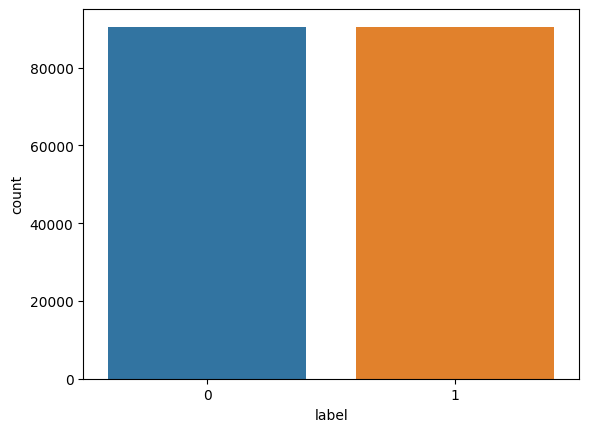

In [14]:
# saving the name of the target variable
target = 'label'

import numpy as np
minority_class_len = len(weatherData[weatherData[target] == 1])
majority_class_indices = weatherData[weatherData[target] == 0].index

random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)

minority_class_indices = weatherData[weatherData[target] == 1].index

under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

under_sample = weatherData.loc[under_sample_indices]

import seaborn as sns
sns.countplot(x = target, data = under_sample)


In [15]:
und_x = under_sample.loc[:, weatherData.columns !=target]
und_y = under_sample.loc[:, weatherData.columns == target]

from sklearn.ensemble import RandomForestClassifier
from statistics import mean
RF_accuracy_scores = []
RF_f1_scores = []

for train_index, test_index in skf.split(und_x, und_y):
    x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
    RF_accuracy_scores.append(get_accuracy_score(RandomForestClassifier(n_estimators=10, random_state = 10), x_train, x_test, y_train, y_test))
    RF_f1_scores.append(get_f1_score(RandomForestClassifier(n_estimators=10, random_state = 10), x_train, x_test, y_train, y_test))

print('Accuracy Score RF:',mean(RF_accuracy_scores))
print('F1 Score RF:', mean(RF_f1_scores))




C:\Users\mashr\AppData\Local\Temp\ipykernel_12532\783866468.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
C:\Users\mashr\AppData\Local\Temp\ipykernel_12532\783866468.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
C:\Users\mashr\AppData\Local\Temp\ipykernel_12532\783866468.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
C:\Users\mashr\AppData\Local\Temp\ipykernel_12532\783866468.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_t

Accuracy Score RF: 0.9118741991074191
F1 Score RF: 0.9117942396512861
